<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Developing-the-Parts" data-toc-modified-id="Developing-the-Parts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Developing the Parts</a></span><ul class="toc-item"><li><span><a href="#Computing-p(D-|-cosi)" data-toc-modified-id="Computing-p(D-|-cosi)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Computing p(D | cosi)</a></span></li><li><span><a href="#p(cosi-|-K)" data-toc-modified-id="p(cosi-|-K)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>p(cosi | K)</a></span></li><li><span><a href="#Computing-p(D-|-K)" data-toc-modified-id="Computing-p(D-|-K)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Computing p(D | K)</a></span></li></ul></li><li><span><a href="#p(K-|-D)" data-toc-modified-id="p(K-|-D)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>p(K | D)</a></span><ul class="toc-item"><li><span><a href="#p(cosi-|-K)-where-K-is-the-argmax-of-P(K|D)" data-toc-modified-id="p(cosi-|-K)-where-K-is-the-argmax-of-P(K|D)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>p(cosi | K) where K is the argmax of P(K|D)</a></span></li><li><span><a href="#Hist" data-toc-modified-id="Hist-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Hist</a></span></li></ul></li><li><span><a href="#2d-Fisher" data-toc-modified-id="2d-Fisher-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2d Fisher</a></span></li><li><span><a href="#Plotting-&amp;-Testing" data-toc-modified-id="Plotting-&amp;-Testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting &amp; Testing</a></span></li></ul></div>

In [1]:
import pandas as pd
#from Scripts.cosi_likelihood import Likelihood as p_D_cosi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
main_dir = "/u/kaimibk/Documents/Research/NAC/"
data_dir = main_dir+"data/"
out_dir = main_dir+"output/"
fig_dir = out_dir+"figs/"

In [3]:
df = pd.read_csv(data_dir+"Pleiades_master.csv", index_col=0)
features = ["V_iso", "V_iso_err", "VSINI", "EVSINI", "distribution"]

In [4]:
cuts = pd.read_csv(data_dir+"pleiades_mk_binflag.csv")

df = pd.merge(df, cuts, on="Name")

In [5]:
df.head(2)

,Name,RA,Dec,K2MASS,(V-K)o,Period,Ref_x,BCK,logL/Lo,M/Mo,...,k2_e_teff,band,Index,iso_rad_K2,iso_rad_err_K2,iso_teff_K2,iso_teff_err_K2,mk,binflag_mg,Ref_y
0,J03394633+2358531,54.943067,23.981442,11.83,4.89,1.138,1.0,2.73,-1.66,0.41,...,348.0,kmag,0,0.419426,0.013360,4222.314643,100.0,6.172569,False,1
1,J03414664+2301198,55.444367,23.022186,13.16,5.63,0.294,1.0,2.81,-2.23,0.19,...,144.0,kmag,1,0.268599,0.009612,3951.132391,100.0,7.385789,False,1


In [6]:
df = df[(df.binflag_mg == False) & (df.mk >= 4.5)]

## Developing the Parts

### Computing p(D | cosi)

In [5]:
cosi = np.arange(0.0, 1.002, 0.002)
cos_df = pd.DataFrame(columns=["{}".format(round(i,3)) for i in cosi])

In [6]:
for index, row in df.iterrows():
    if index % 10 == 0: print(index)
    
    v, v_sigma, vsini, vsini_sigma, dist = row[features].values
    
    L = p_D_cosi(cosi, v, v_sigma, vsini, vsini_sigma, distribution=dist)

    cos_df.loc[index] = L

cos_df["name"] = df.Name

0
10


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

20
30
40


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

50


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

60
70
80
90
100
110
120


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

130


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


140
150
160
170


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

180
190


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

200


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

210
220


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

230
240
250


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

260
270


/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff 

280


In [8]:
cos_df.to_csv(main_dir+"Pleiades_cosi.csv")

### p(cosi | K)

In [62]:
import scipy.stats as st

In [63]:
#cosi = np.arange(0.0, 1.002, 0.002)
cosi = np.linspace(-1.0, 1.0, 1002)
kappa = np.logspace(-1, 2, 100)

In [104]:
#class my_pdf(st.rv_continuous):
    
#     def _pdf(self, k, cosi):
#         temp = (k / (2*np.sinh(k)))*np.exp(k*cosi)#k / (2*np.sinh(k)) * np.exp(k*cosi)
#         #norm = np.trapz(k / (2.*np.sinh(k)) * np.exp(k*cosi), dx=0.005)
#         return temp#/norm
    
#fisher = my_pdf(name="fisher")

def fisher(k ,cosi):
    #global cosi
    return (k / (2*np.sinh(k)))*np.exp(k*cosi)

/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  """


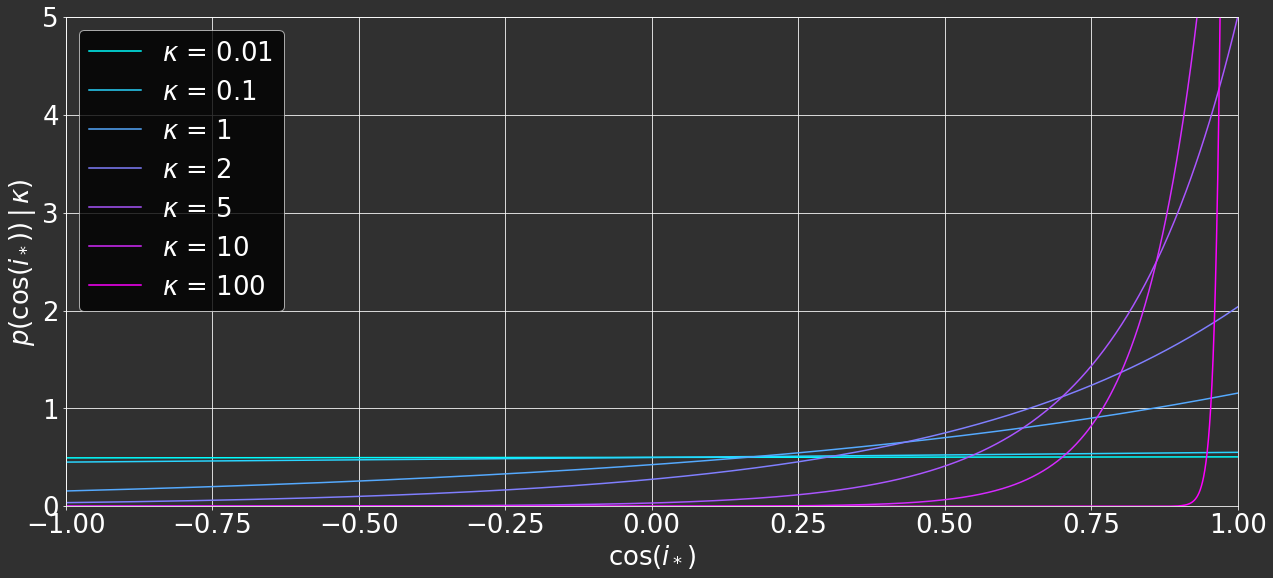

In [111]:
fig=plt.figure(figsize=(21,9))
plt.grid()
ax = plt.gca()
colormap = plt.get_cmap('cool')
ax.set_color_cycle([colormap(k) for k in np.linspace(0, 1, 7)])

for k in [0.01, 0.1, 1, 2, 5, 10, 100]:
    #ax.plot(cosi, fisher.pdf(k, cosi))#, label="$\kappa = {}$".format(k))
    ax.plot(cosi, fisher(k, cosi), label='$\kappa$ = {}'.format(k))
ax.set_xlim(-1,1.0)
ax.set_ylim(0,5)
ax.set_xlabel("$\cos(i_*)$")
ax.set_ylabel("$p(\cos(i_*)) \, | \, \kappa)$")
ax.legend(prop={'size': 26})
fig.patch.set_facecolor('#303030')
ax.set_facecolor("#303030")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(26)

plt.savefig(fig_dir+"P_cosi_K.png", bbox_inches="tight", dpi=150, 
            facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()

### Computing p(D | K)

In [393]:
from scipy.integrate import quad

In [9]:
cos_df = pd.read_csv(main_dir+"Pleiades_cosi.csv", index_col=0)

In [128]:
kappa = np.logspace(-2, 2, 400)
#cosi = np.arange(0.0, 1.002, 0.002)
cosi = np.linspace(-1.0, 1.0, 1002)
result = np.ones([len(cos_df), len(kappa)])

i = 0
## For each kappa
for k in kappa:
    if i % 10 == 0: print(i)
    p_Di_K = np.ones(len(cos_df))
    ## For each star
    for index, row in cos_df.iterrows():
        if pd.isna(row[0:-2]).any():
            p_Di_K[index] = 1.0
            continue
        if row.name not in df.Name:
            p_Di_K[index] = 1.0
            continue
            
        p_D_cosi = row.values[0:-2]
        p_D_cosi = np.concatenate((np.flip(p_D_cosi, axis=0), p_D_cosi), axis=0)
        p_cosi_k = fisher(k, cosi)#fisher.pdf(k, cosi)
        #p_cosi_k[np.isnan(p_cosi_k)] = 1.0
        p_Di_K[index] = (np.nansum(np.nanprod([p_D_cosi, p_cosi_k], axis=0)))
        #p_Di_K[index] = quad(integrand, -1, 1, args=(p_D_cosi, p_cosi_k))[0]

    p_Di_K[np.where(np.logical_or(p_Di_K == 0, p_Di_K is np.nan))] = 1.0
    result[:,i] = np.log10(p_Di_K)
    i += 1

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390


<Figure size 432x288 with 0 Axes>

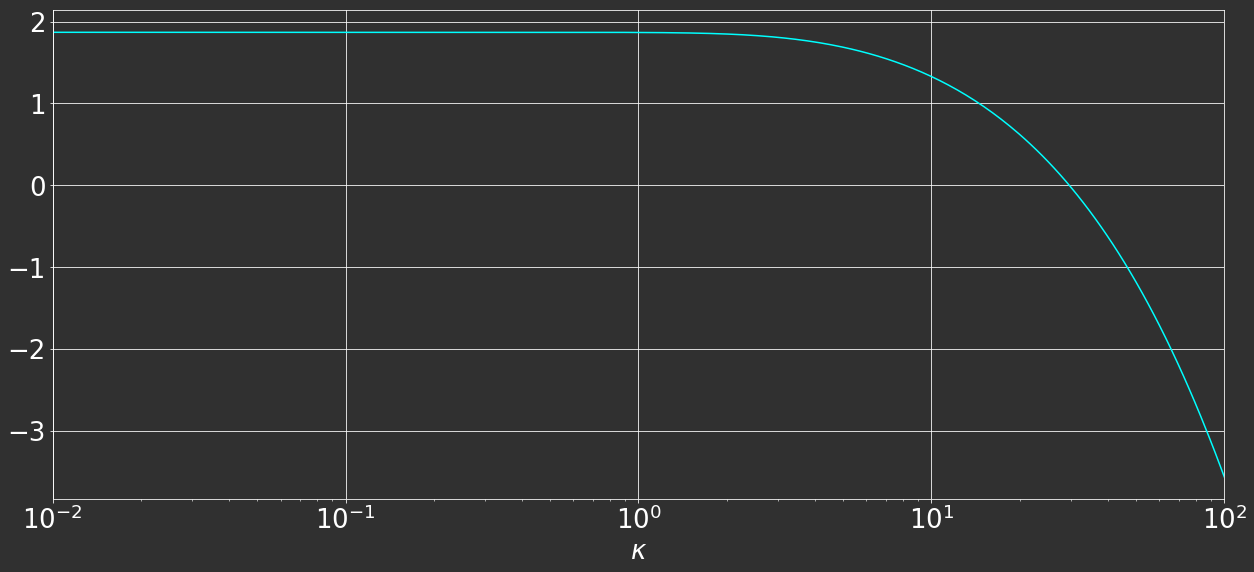

In [129]:
plt.style.use("dark_background")
plt.clf()
fig=plt.figure(figsize=(21,9))
fig.patch.set_facecolor('#303030')
plt.grid()
ax = plt.gca()

p_D_K = np.sum(result, axis=0)
ax.plot(kappa, p_D_K /np.trapz(p_D_K, dx=0.002), color='cyan')
#ax.set_ylim(0,10)
ax.set_xlim(0.01, 100)
ax.set_xscale('log')

ax.set_xlabel('$\kappa$')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(26)
ax.set_facecolor("#303030")

#plt.legend()
plt.savefig(fig_dir+"p_D_k.png", bbox_inches='tight', dpi=300,
            facecolor=fig.get_facecolor(), edgecolor='none')
#plt.show()

## p(K | D)

In [130]:
prior = np.asarray(list(map(lambda x: (1+x**2)**(-3.0/4.0), kappa)))
#norm_prior = prior/np.trapz(prior, dx=0.5)
e_p_D_K = 10**(p_D_K - 600.0)
p_K_D = prior * e_p_D_K

/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


<Figure size 432x288 with 0 Axes>

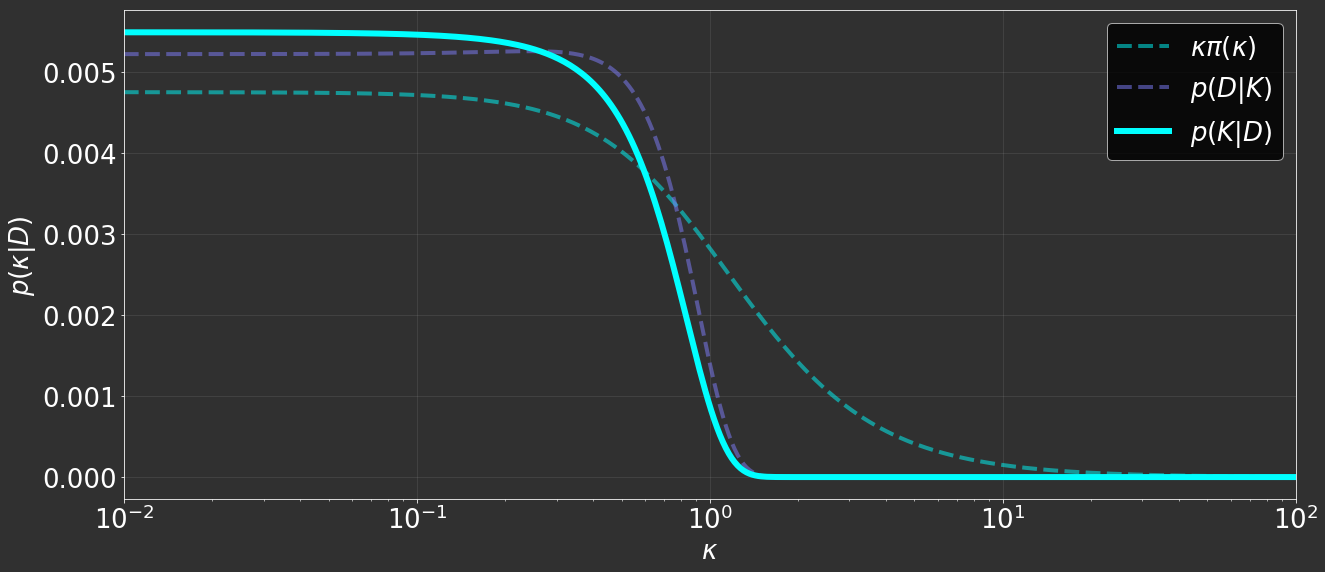

In [131]:
plt.clf()
fig=plt.figure(figsize=(21,9))
fig.patch.set_facecolor('#303030')
plt.grid(alpha=0.1)
ax = plt.gca()

colormap = plt.get_cmap('cool')
ax.set_color_cycle([colormap(k) for k in np.linspace(0, 1, 3)])

ax.plot(kappa, prior / np.trapz(prior), label="$\kappa\pi(\kappa)$", 
        linewidth=4, alpha=0.5, linestyle='dashed')
ax.plot(kappa, e_p_D_K / np.trapz(e_p_D_K), label="$p(D|K)$", linewidth=4, alpha=0.5,
        linestyle='dashed')
ax.plot(kappa, p_K_D / np.trapz(p_K_D), label="$p(K|D)$", linewidth=6, color='cyan')
ax.legend(prop={'size': 26})
ax.set_xscale('log')
ax.set_xlim(.01, 100)
ax.set_xlabel('$\kappa$')
ax.set_ylabel('$p(\kappa | D)$')


for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(26)
ax.set_facecolor("#303030")

#ax.set_xlim(1,5)
plt.savefig(fig_dir+"p_K_D.png", bbox_inches='tight', dpi=300,
           facecolor=fig.get_facecolor(), edgecolor='none')

### p(cosi | K) where K is the argmax of P(K|D)

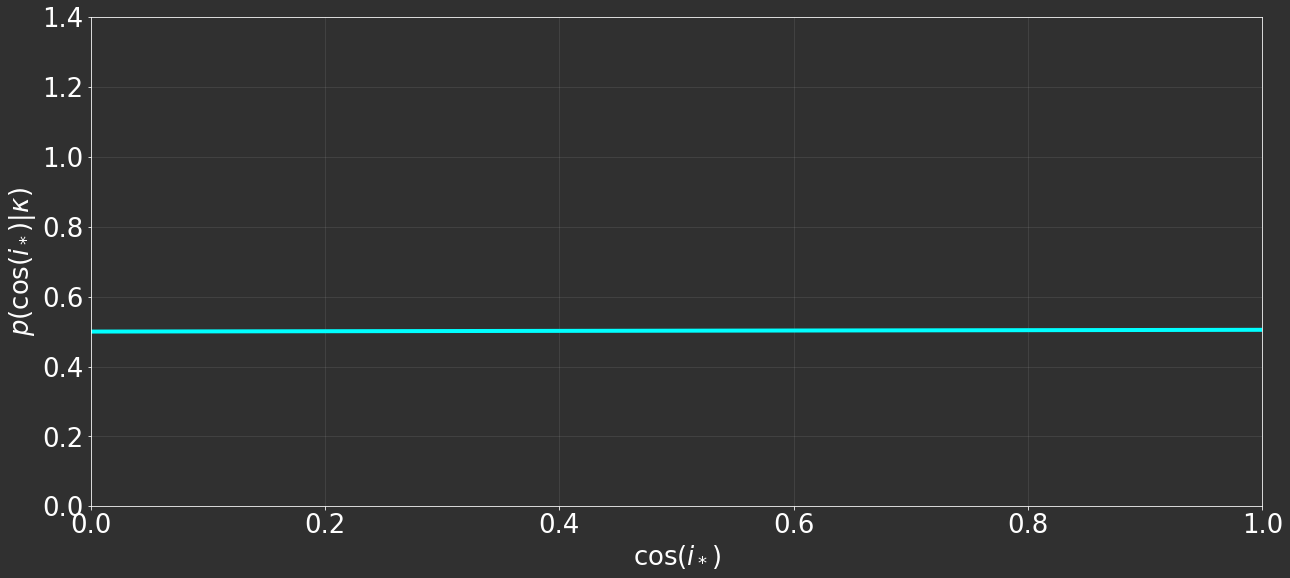

In [132]:
fig = plt.figure(figsize=(21,9))
fig.patch.set_facecolor('#303030')
plt.grid(alpha=0.1)

ax = plt.gca()
ax.plot(cosi, fisher(kappa[np.argmax(p_K_D)], cosi), linewidth=4, color='cyan')
#plt.hist(p_K_D / np.trapz(p_K_D), cumulative=True, normed=True)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(26)
ax.set_xlabel('$\cos(i_*)$')
ax.set_ylabel('$p(\cos(i_*) | \kappa)$')

ax.set_facecolor("#303030")
ax.set_ylim(0, 1.4)
ax.set_xlim(0,1)

plt.savefig(fig_dir+"p_cosi_optK.png", bbox_inches='tight', dpi=150,
           facecolor=fig.get_facecolor(), edgecolor='none')

### Hist

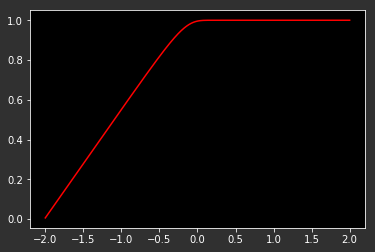

In [133]:
fig=plt.figure()
fig.patch.set_facecolor('#303030')
ax = plt.gca()

z=np.cumsum(p_K_D)
z = z/z[-1]
ax.plot(np.log10(kappa), z, color='red')

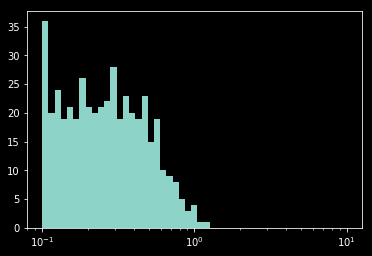

In [134]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

fig = plt.figure()
ax = plt.gca()
ax.hist([kappa[find_nearest(z,i)] for i in np.random.rand(1000)], 
        bins=np.logspace(-1,1))
ax.set_xscale('log')

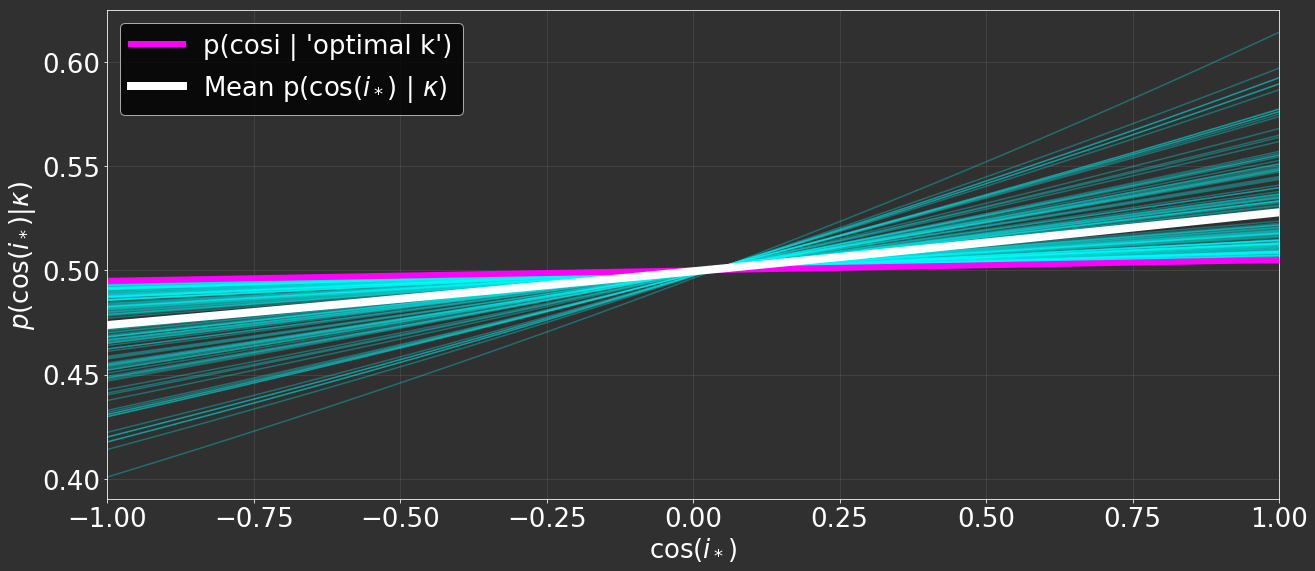

In [143]:
kappa = np.logspace(-2, 2, 600)
fig=plt.figure(figsize=(21,9))
ax = plt.gca()
plt.grid(alpha=0.1)
fig.patch.set_facecolor('#303030')

temp = []

for i, j in enumerate(np.random.rand(150)):
    k = kappa[find_nearest(z, j)]
    y = fisher(k, cosi)
    ax.plot(cosi, y, color='cyan', alpha=0.3)
    temp.append(y)

ax.plot(cosi, fisher(kappa[np.argmax(p_K_D)], cosi), linewidth=6, color='magenta', label='p(cosi | \'optimal k\')')
ax.plot(cosi, np.mean(temp, axis=0), linewidth=8, color='white', label='Mean p($\cos(i_*)$ | $\kappa$)')

#ax.axhline(xmin=-1, xmax=1, y=0.5, color="grey", linewidth=4, linestyle='dashed')
#ax.legend(prop={'size': 10})
ax.set_ylabel('$p(\cos(i_*) | \kappa)$')
ax.set_xlabel('$\cos(i_*)$')
ax.set_xlim(-1,1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(26)
ax.set_facecolor("#303030")
ax.legend(prop={'size': 26})
plt.savefig(fig_dir+"p_cosi_Ksample.png", bbox_inches='tight', dpi=150,
           facecolor=fig.get_facecolor(), edgecolor='none')

/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


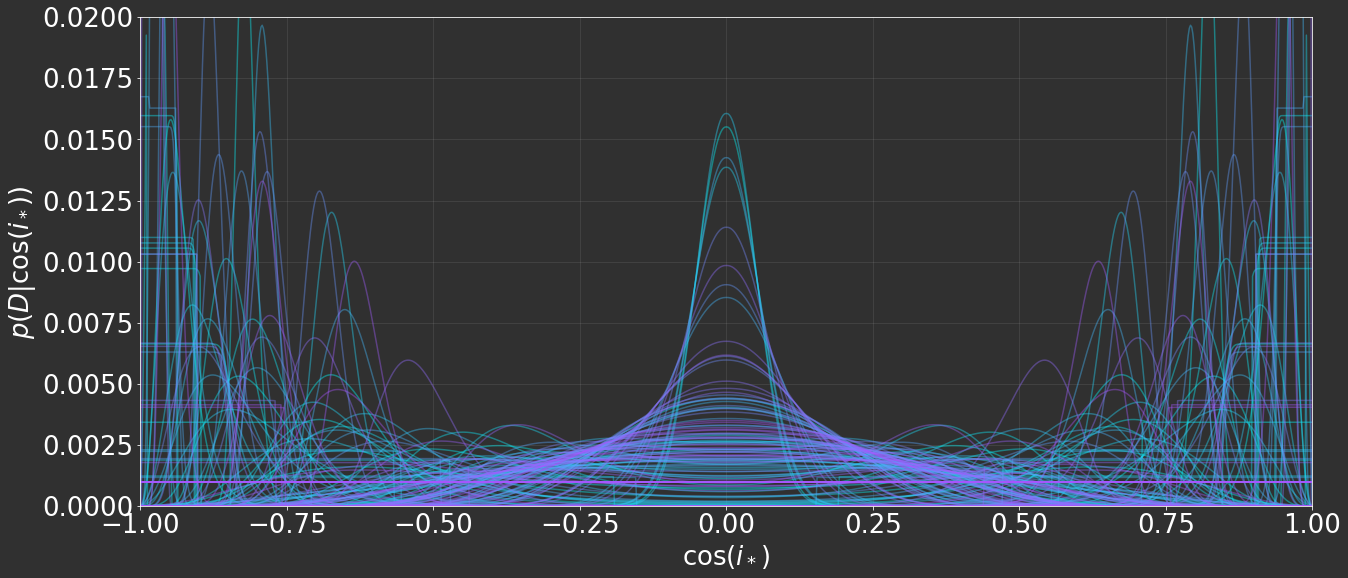

In [100]:
kappa = np.logspace(-2, 2, 600)
fig=plt.figure(figsize=(21,9))
ax = plt.gca()
plt.grid(alpha=0.1)
fig.patch.set_facecolor('#303030')

colormap = plt.get_cmap('cool')
ax.set_color_cycle([colormap(k) for k in np.linspace(0, 1, 288)])

for index, row in cos_df.iterrows():
    if row.name not in df.Name:
        continue
    p_D_cosi = row.values[0:-2]
    p_D_cosi = np.concatenate((np.flip(p_D_cosi, axis=0), p_D_cosi), axis=0)
    
    plt.plot(cosi, p_D_cosi / np.trapz(p_D_cosi), alpha=0.4)
        
ax.set_ylim(0, 0.02)
ax.set_xlim(-1, 1)
ax.set_facecolor("#303030")
ax.set_xlabel("$\cos(i_*)$")
ax.set_ylabel("$p(D | \cos(i_*))$")

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(26)

plt.savefig(fig_dir+"p_D_cosi_all.png", bbox_inches='tight', dpi=300,
           facecolor=fig.get_facecolor(), edgecolor='none')

/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  if __name__ == '__main__':


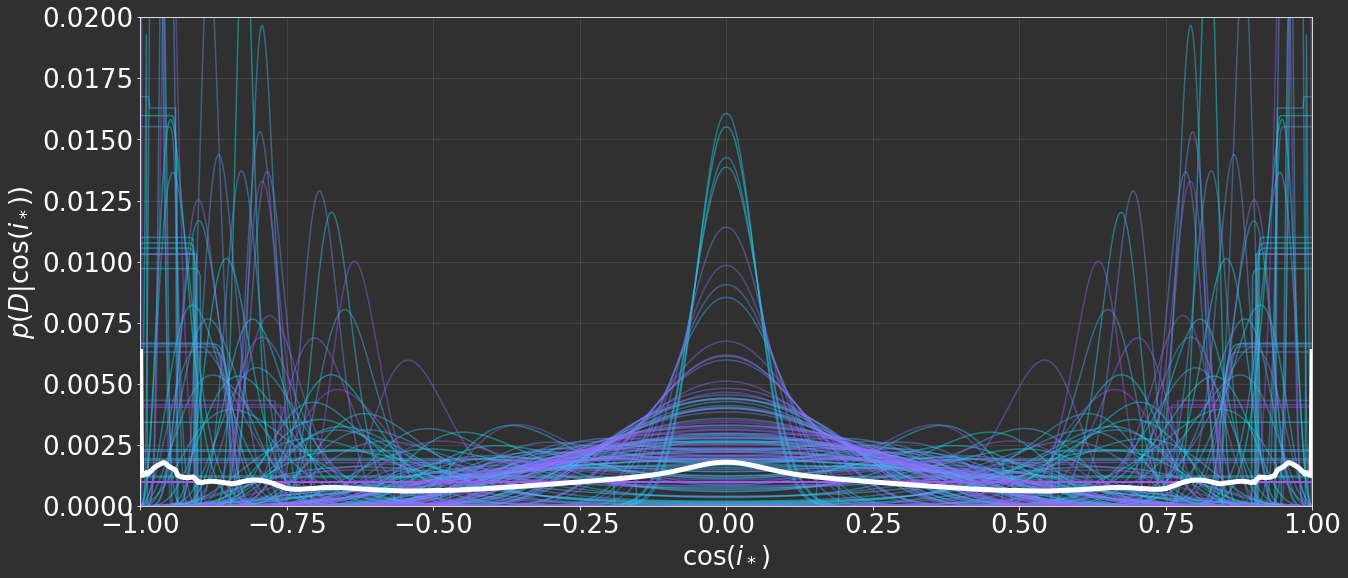

In [138]:
kappa = np.logspace(-2, 2, 600)
cosi = np.linspace(-1.0, 1.0, 1002)
fig=plt.figure(figsize=(21,9))
ax = plt.gca()
plt.grid(alpha=0.1)
fig.patch.set_facecolor('#303030')

colormap = plt.get_cmap('cool')
ax.set_color_cycle([colormap(k) for k in np.linspace(0, 1, 288)])
means = []

for index, row in cos_df.iterrows():
    if row.name not in df.Name:
        continue
    p_D_cosi = row.values[0:-2]
    p_D_cosi = np.concatenate((np.flip(p_D_cosi, axis=0), p_D_cosi), axis=0)
    
    try:
        means.append(p_D_cosi / np.trapz(p_D_cosi))
    except AttributeError:
        means.append([np.NaN]*len(cosi))
    
    plt.plot(cosi, p_D_cosi / np.trapz(p_D_cosi), alpha=0.4)

means = np.asarray(means)
plt.plot(cosi, np.nanmean(means, axis=0), linewidth=5, color="white")
ax.set_ylim(0, 0.02)
ax.set_xlim(-1, 1)
ax.set_facecolor("#303030")
ax.set_xlabel("$\cos(i_*)$")
ax.set_ylabel("$p(D | \cos(i_*))$")

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(26)

plt.savefig(fig_dir+"p_D_cosi_all.png", bbox_inches='tight', dpi=300,
           facecolor=fig.get_facecolor(), edgecolor='none')

## 2d Fisher

In [7]:
def fisher_2d(x, k, mu):
    angs = np.random.vonmises(np.arccos(mu), k, 50000)
    bins = 100
    pdf, bin = np.histogram(np.cos(angs), weights=np.abs(angs), normed=True, bins=bins)
    inds = np.digitize(x,bin)
    inds[inds >= bins] = bins-1
    return pdf[inds]/np.sum(pdf[inds]) / (x[1] - x[0])

In [15]:
from tqdm import tqdm
cosi = np.linspace(-1.0, 1.0, 1002)
kappa = np.logspace(-2., 1., 100)
mus = np.linspace(-1, 1, 100)

result = np.ones([len(cos_df), len(kappa), len(mus)])

i = 0

for mu_i, mu in enumerate(tqdm(mus)):
    ##if mu_i % 2 ==0: print("mu : {}".format(mu_i))
    ## For each kappa
    for k_i, k in enumerate(kappa):
        #if k_i % 50 == 0: print("\t k : {}".format(k_i))
        p_Di_K = np.ones(len(cos_df))
        ## For each star
        for index, row in cos_df.iterrows():
            if pd.isna(row[0:-2]).any():
                p_Di_K[index] = 1.0
                continue
            if row.name not in df.Name:
                p_Di_K[index] = 1.0
                continue

            p_D_cosi = row.values[0:-2]
            p_D_cosi = np.concatenate((np.flip(p_D_cosi, axis=0), p_D_cosi), axis=0)
            p_cosi_k = fisher_2d(cosi, k ,mu)
            p_Di_K[index] = (np.nansum(np.nanprod([p_D_cosi, p_cosi_k], axis=0)))
            #p_Di_K[index] = quad(integrand, -1, 1, args=(p_D_cosi, p_cosi_k))[0]

        p_Di_K[np.where(np.logical_or(p_Di_K == 0, p_Di_K is np.nan))] = 1.0
        result[:,k_i, mu_i] = np.log10(p_Di_K)
        i += 1




  0%|          | 0/100 [00:00<?, ?it/s]


  1%|          | 1/100 [02:34<4:15:12, 154.68s/it]


  2%|▏         | 2/100 [05:08<4:11:32, 154.00s/it]


  3%|▎         | 3/100 [07:38<4:07:11, 152.90s/it]


  4%|▍         | 4/100 [10:08<4:03:22, 152.11s/it]


  5%|▌         | 5/100 [12:38<4:00:03, 151.61s/it]


  6%|▌         | 6/100 [15:07<3:56:51, 151.18s/it]


  7%|▋         | 7/100 [17:36<3:53:53, 150.90s/it]


  8%|▊         | 8/100 [20:04<3:50:51, 150.56s/it]


  9%|▉         | 9/100 [22:32<3:47:59, 150.33s/it]


 10%|█         | 10/100 [25:02<3:45:18, 150.21s/it]


 11%|█         | 11/100 [27:28<3:42:16, 149.84s/it]


 12%|█▏        | 12/100 [29:56<3:39:32, 149.68s/it]


 13%|█▎        | 13/100 [32:23<3:36:45, 149.49s/it]


 14%|█▍        | 14/100 [34:51<3:34:08, 149.40s/it]


 15%|█▌        | 15/100 [37:19<3:31:29, 149.29s/it]


 16%|█▌        | 16/100 [39:46<3:28:48, 149.15s/it]


 17%|█▋        | 17/100 [42:12<3:26:03, 148.95s/it]


 18%|█▊        | 18/100 [44:38<3:23:20, 148.78

/u/kaimibk/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPytho

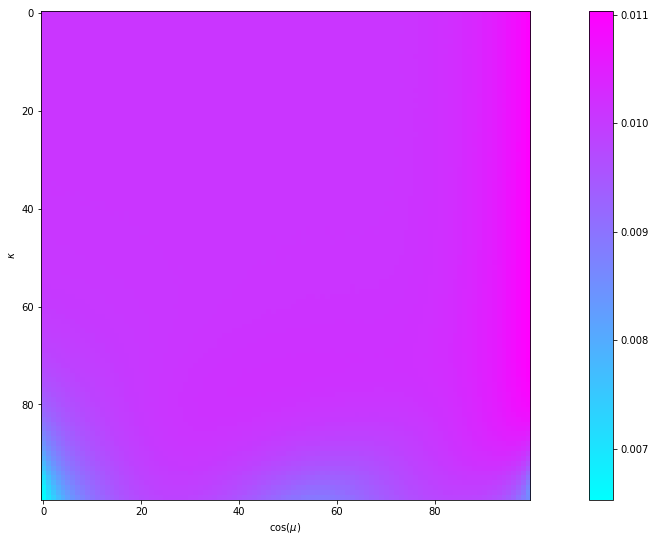

In [95]:
panel = pd.Panel(result).swapaxes(0,2)

fig, ax = plt.subplots(figsize=(21,9))
im = ax.imshow(panel.sum(axis=2).values/np.trapz(panel.sum(axis=2).values), cmap='cool', interpolation='none')
#ax.set_xticks(np.arange(len(mus)))
#ax.set_yticks(np.arange(len(kappa)))

#ax.set_xticklabels(np.round(mus, 2))
#ax.set_yticklabels(np.round(kappa, 4))

# index = 0
# for labelx, labely in zip(ax.xaxis.get_ticklabels()[::2], ax.yaxis.get_ticklabels()[::2]):
#     if index % 100 != 0:
#         labelx.set_visible(False)
#         labely.set_visible(False)
#     index += 1
ax.set_xlabel('$\cos(\mu)$')
ax.set_ylabel('$\kappa$')
fig.colorbar(im)

## Plotting & Testing

In [188]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# from Scripts.plotly_save import save_fig

In [192]:
cosi = np.arange(0.0, 1.002, 0.002)
cos_df = pd.read_csv(main_dir+"Pleiades_cosi.csv", index_col=0)

In [29]:
order = df.sort_values(["iso_rad_K2"])

/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

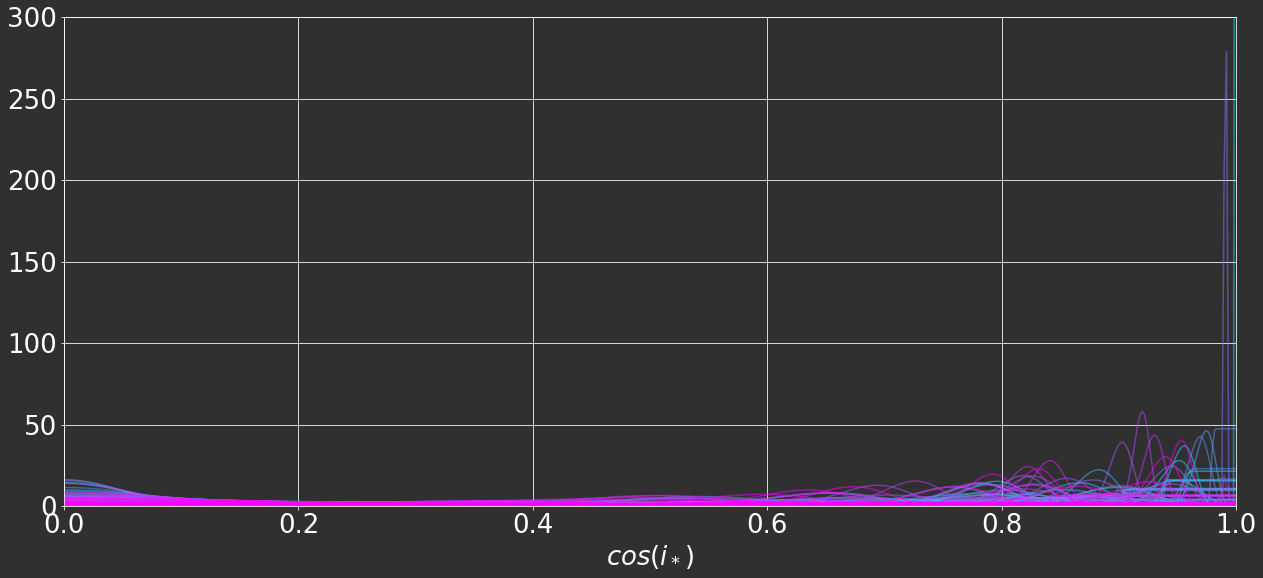

In [43]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.clf()
fig=plt.figure(figsize=(21,9))
fig.patch.set_facecolor('#303030')
plt.grid()
ax = plt.gca()
colormap = plt.get_cmap('cool')
ax.set_color_cycle([colormap(k) for k in range(len(cos_df))])

for index, row in order.iterrows():
    #ax.plot(cosi, row.values[~row.index.isin(["name"])])
    ax.plot(cosi, cos_df.iloc[index].values[0:-2], alpha=0.5)
    
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(26)

ax.set_facecolor("#303030")
ax.set_xlim(0,1)
ax.set_ylim(0,300)
ax.set_xlabel("$cos(i_*)$")
plt.savefig(fig_dir+"P_D_cosi.png", bbox_inches="tight", dpi=150, 
            facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

<Figure size 432x288 with 0 Axes>